# IT5100F - Assignment 1
Semester: AY2024/2025 Semester 1

## Administrative instructions
- Register your team on Canvas
- Once you have completed the assignment, download the `.ipynb` file, rename it as per the submission requirement and upload it to Canvas
- Enter the team details below

## Team submitting the assignment

|Team member | Name | NUSNet ID (exxxxxxx) | Student number (AxxxxxxxZ) |
|------------|------|----------------------|----------------------------|
| 1 | Jocelyn Sursas  | E1325162 | A0118816B |
| 2 | Lai Foong Ming  | E1101544 | A0268245X |
| 3 | Rifqi Rafifandi | E1325998 | A0290545B   
| 4 | Try Wijono      | E1326007 | A0290554B |

## Programming instructions
- Make Sure to keep the variable names as they are
- You are allowed to use the following libraries: NumPy, Pandas, Scikit-learn, Matplotlib, Seaborn, SciPy, and Statsmodels

## AI Tools Usage
AI tools such as ChatGPT and GitHub Copilot were used to help generate codes for this assignment.


## Dataset
- Endomondo Dataset comprises of sport records from Endomondo, a fitness tracking website.
    - It includes sensory data such as heart rate, speed, and longitude, collected from various users during different workouts.

- Download the dataset from the following link: [Endomondo dataset](https://drive.google.com/file/d/1HLgCkCIBmkso2kGzGDHVTtlLzPBEsh_m/view?usp=drive_link)


### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

### Part 1: Data Preprocessing

#### 1.1 Data Loading

Load the dataset to a data frame using `read_json`

In [ ]:
# TODO: Complete the code here

# Mount GoogleDrive
from google.colab import drive
drive.mount('/content/drive')

# Read the JSON file as a Data Frame
endomondo_df = pd.read_json('/content/drive/MyDrive/Colab Notebooks/endomondo_proper.json', lines=True)

# Display the first few rows of the DataFrame
endomondo_df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,altitude,heart_rate,id,latitude,longitude,speed,sport,timestamp
0,"[41.6, 40.6, 40.6, 38.4, 37.0, 34.0, 34.0, 34....","[100, 111, 120, 119, 120, 116, 125, 128, 131, ...",396826535.0,"[60.1733487658, 60.1732398011, 60.1729802135, ...","[24.6497704089, 24.650142733, 24.650910683, 24...","[6.8652, 16.4736, 19.1988, 20.4804, 31.3956, 3...",bike,"[1408898746, 1408898754, 1408898765, 140889877..."
1,"[38.4, 39.0, 39.0, 38.2, 36.8, 36.8, 36.8, 35....","[100, 105, 111, 110, 108, 115, 126, 130, 132, ...",392337038.0,"[60.1732475962, 60.1732096262, 60.1729796268, ...","[24.6498552337, 24.6501554735, 24.6508813463, ...","[9.0792, 13.284, 15.9336, 10.9476, 16.1676, 30...",bike,"[1408221682, 1408221687, 1408221699, 140822170..."
2,"[28.6, 29.4, 29.4, 29.4, 28.0, 27.0, 25.2, 23....","[99, 105, 113, 109, 112, 116, 116, 114, 114, 1...",386729739.0,"[60.1732862368, 60.1732394658, 60.1730676368, ...","[24.6498743445, 24.6502427291, 24.6508224215, ...","[7.4988, 15.4008, 17.8668, 21.5712, 24.1416, 3...",bike,"[1407432042, 1407432048, 1407432056, 140743206..."
3,"[24.0, 24.0, 24.0, 21.0, 18.6, 17.4, 17.4, 17....","[118, 118, 119, 120, 122, 124, 126, 129, 133, ...",381185226.0,"[60.173279196, 60.1732723229, 60.1732617617, 6...","[24.6498169284, 24.6498684771, 24.6500092093, ...","[7.218, 9.8208, 14.3532, 16.2972, 20.1276, 20....",bike (transport),"[1406647079, 1406647080, 1406647082, 140664708..."
4,"[21.2, 22.0, 22.0, 20.6, 19.8, 19.4, 17.6, 15....","[100, 98, 104, 104, 107, 109, 108, 105, 105, 1...",371302193.0,"[60.1732459199, 60.173199987, 60.1730691455, 6...","[24.650183385200002, 24.6504225209, 24.6508663...","[16.4124, 11.682, 18.162, 21.7728, 24.408, 26....",bike,"[1405100572, 1405100576, 1405100582, 140510059..."


#### 1.2 Data Cleaning
Dealing with null values.

In [ ]:
#Display the shape of the dataframe
print(endomondo_df.shape)

(21391, 8)


In [ ]:
# TODO: Find the total number of missing rows with null values in any column
total_missing = endomondo_df.isnull().any(axis=1).sum()

# Print the total number of missing values
print(total_missing)

2000


In [ ]:
# TODO: Clean the data by removing rows with missing values
endomondo_cleaned_df = endomondo_df.dropna()
print(endomondo_cleaned_df.shape)

(19391, 8)


In [ ]:
# TODO: Check the results of data cleaning
total_cleaned_missing = endomondo_cleaned_df.isnull().sum()
print(total_cleaned_missing)

altitude      0
heart_rate    0
id            0
latitude      0
longitude     0
speed         0
sport         0
timestamp     0
dtype: int64


#### 1.3 Data Transformation

- Ensure data consistency
- Transform the dataset
- Convert timestamps
- Check and remove Null values, if any

In [ ]:
# TODO: Ensure consistency by verifying that the number of entries in the altitude, latitude, longitude, timestamp, heart_rate, and speed arrays is the same for each id

#create a copy of the df
copy = endomondo_cleaned_df.copy()

#first add a column to the df for the count of each element
copy['altitude_lens'] = copy['altitude'].apply(len)
copy['heart_rate_lens'] = copy['heart_rate'].apply(len)
copy['speed_lens'] = copy['speed'].apply(len)
copy['latitude_lens'] = copy['latitude'].apply(len)
copy['longitude_lens'] = copy['longitude'].apply(len)
copy['timestamp_lens'] = copy['timestamp'].apply(len)


In [ ]:
#Check columns are added to the copy properly
copy.head()

,altitude,heart_rate,id,latitude,longitude,speed,sport,timestamp,altitude_lens,heart_rate_lens,speed_lens,latitude_lens,longitude_lens,timestamp_lens
0,"[41.6, 40.6, 40.6, 38.4, 37.0, 34.0, 34.0, 34....","[100, 111, 120, 119, 120, 116, 125, 128, 131, ...",396826535.0,"[60.1733487658, 60.1732398011, 60.1729802135, ...","[24.6497704089, 24.650142733, 24.650910683, 24...","[6.8652, 16.4736, 19.1988, 20.4804, 31.3956, 3...",bike,"[1408898746, 1408898754, 1408898765, 140889877...",500,500,500,500,500,500
1,"[38.4, 39.0, 39.0, 38.2, 36.8, 36.8, 36.8, 35....","[100, 105, 111, 110, 108, 115, 126, 130, 132, ...",392337038.0,"[60.1732475962, 60.1732096262, 60.1729796268, ...","[24.6498552337, 24.6501554735, 24.6508813463, ...","[9.0792, 13.284, 15.9336, 10.9476, 16.1676, 30...",bike,"[1408221682, 1408221687, 1408221699, 140822170...",500,500,500,500,500,500
2,"[28.6, 29.4, 29.4, 29.4, 28.0, 27.0, 25.2, 23....","[99, 105, 113, 109, 112, 116, 116, 114, 114, 1...",386729739.0,"[60.1732862368, 60.1732394658, 60.1730676368, ...","[24.6498743445, 24.6502427291, 24.6508224215, ...","[7.4988, 15.4008, 17.8668, 21.5712, 24.1416, 3...",bike,"[1407432042, 1407432048, 1407432056, 140743206...",500,500,500,500,500,500
3,"[24.0, 24.0, 24.0, 21.0, 18.6, 17.4, 17.4, 17....","[118, 118, 119, 120, 122, 124, 126, 129, 133, ...",381185226.0,"[60.173279196, 60.1732723229, 60.1732617617, 6...","[24.6498169284, 24.6498684771, 24.6500092093, ...","[7.218, 9.8208, 14.3532, 16.2972, 20.1276, 20....",bike (transport),"[1406647079, 1406647080, 1406647082, 140664708...",500,500,500,500,500,500
4,"[21.2, 22.0, 22.0, 20.6, 19.8, 19.4, 17.6, 15....","[100, 98, 104, 104, 107, 109, 108, 105, 105, 1...",371302193.0,"[60.1732459199, 60.173199987, 60.1730691455, 6...","[24.650183385200002, 24.6504225209, 24.6508663...","[16.4124, 11.682, 18.162, 21.7728, 24.408, 26....",bike,"[1405100572, 1405100576, 1405100582, 140510059...",500,500,500,500,500,500


In [ ]:
# Check if there are any rows with len(latitude) != len(longitude) != len(altitude) != len(timestamp) != len(heart_rate) != len(speed)

#Group the dataframe by ID
grouped = copy.groupby('id')

#Create a function that checks for the lengths of the specific columns and ensure they are unique (identical)
def check_length(group):
    length = group[['altitude_lens', 'heart_rate_lens', 'speed_lens', 'latitude_lens','longitude_lens','timestamp_lens']]
    return length.nunique(axis=1).eq(1).all()

#find inconsistent rows
inconsistent_rows = copy.groupby('id').filter(lambda x: not check_length(x))

# Print the inconsistent rows
print(inconsistent_rows)

Empty DataFrame
Columns: [altitude, heart_rate, id, latitude, longitude, speed, sport, timestamp, altitude_lens, heart_rate_lens, speed_lens, latitude_lens, longitude_lens, timestamp_lens]
Index: []


In [ ]:
# TODO: Transform the dataset by expanding each array (altitude, latitude, longitude, timestamp, heart_rate, speed) associated with id into individual columns, making sure each column holds a single value from the array.

columns_to_expand = ['altitude', 'latitude', 'longitude', 'timestamp', 'heart_rate', 'speed']
reorder_cols = ['id', 'latitude', 'longitude', 'altitude', 'timestamp', 'sport', 'speed', 'heart_rate']

#explode 6 columns in df
endomondo_expanded_df = endomondo_cleaned_df.explode(columns_to_expand)

#required ordering as per assignment
endomondo_expanded_df = endomondo_expanded_df[reorder_cols]

# Verify the shape of the new DataFrame
# - Check that the array size makes sense. Shape of endomondo_cleaned_df = 19391, 8
# - Each array has 500 entries
# - Each exploded column should have 19391*500 = 9695500 rows

print(endomondo_expanded_df.shape)
print(endomondo_expanded_df.columns)

(9695500, 8)
Index(['id', 'latitude', 'longitude', 'altitude', 'timestamp', 'sport',
       'speed', 'heart_rate'],
      dtype='object')


In [ ]:
endomondo_expanded_df.head()

,id,latitude,longitude,altitude,timestamp,sport,speed,heart_rate
0,396826535.0,60.173349,24.64977,41.6,1408898746,bike,6.8652,100
0,396826535.0,60.17324,24.650143,40.6,1408898754,bike,16.4736,111
0,396826535.0,60.17298,24.650911,40.6,1408898765,bike,19.1988,120
0,396826535.0,60.172478,24.650669,38.4,1408898778,bike,20.4804,119
0,396826535.0,60.171861,24.649145,37.0,1408898794,bike,31.3956,120


In [ ]:
# TODO: Convert the timestamp column from seconds to a datetime object.
endomondo_expanded_df["timestamp"] = pd.to_datetime(endomondo_expanded_df['timestamp'], unit='s')

In [ ]:
# Inspect the data
endomondo_expanded_df.head()

,id,latitude,longitude,altitude,timestamp,sport,speed,heart_rate
0,396826535.0,60.173349,24.64977,41.6,2014-08-24 16:45:46,bike,6.8652,100
0,396826535.0,60.17324,24.650143,40.6,2014-08-24 16:45:54,bike,16.4736,111
0,396826535.0,60.17298,24.650911,40.6,2014-08-24 16:46:05,bike,19.1988,120
0,396826535.0,60.172478,24.650669,38.4,2014-08-24 16:46:18,bike,20.4804,119
0,396826535.0,60.171861,24.649145,37.0,2014-08-24 16:46:34,bike,31.3956,120


In [ ]:
# TODO: Check and ensure there are no null values in the dataset after the transformation.
total_missing = endomondo_expanded_df.isnull().sum()

# Print the total number of missing values
print(total_missing)


id            0
latitude      0
longitude     0
altitude      0
timestamp     0
sport         0
speed         0
heart_rate    0
dtype: int64


#### 1.4 Data Storage

Save the processed data for further use

In [ ]:
CSV_FILE_NAME = "endomondo_proper_cleaned_expanded.csv"
# TODO 1: Save the cleaned and transformed dataset to a new CSV file with the CSV_FILE_NAME
endomondo_expanded_df.to_csv(CSV_FILE_NAME, index=False)

### Part 2: EDA & Data Visualization
Make sure to complete part 1 before starting part 2

In [ ]:
# TODO: Load the data
CSV_FILE_NAME = "endomondo_proper_cleaned_expanded.csv"
endomondo_df = pd.read_csv(CSV_FILE_NAME)

In [ ]:
endomondo_df.head()

,id,latitude,longitude,altitude,timestamp,sport,speed,heart_rate
0,396826535.0,60.173349,24.649770,41.6,2014-08-24 16:45:46,bike,6.8652,100
1,396826535.0,60.173240,24.650143,40.6,2014-08-24 16:45:54,bike,16.4736,111
2,396826535.0,60.172980,24.650911,40.6,2014-08-24 16:46:05,bike,19.1988,120
3,396826535.0,60.172478,24.650669,38.4,2014-08-24 16:46:18,bike,20.4804,119
4,396826535.0,60.171861,24.649145,37.0,2014-08-24 16:46:34,bike,31.3956,120


#### 2.1 Unique Sports Analysis

In [ ]:
# TODO: Find the total number of unique sports in the dataset
num_unique_sports = endomondo_df['sport'].nunique()
print("Total number of unique sports in the dataset: ", num_unique_sports)

Total number of unique sports in the dataset:  14


#### 2.2 Plot Workouts by Sport

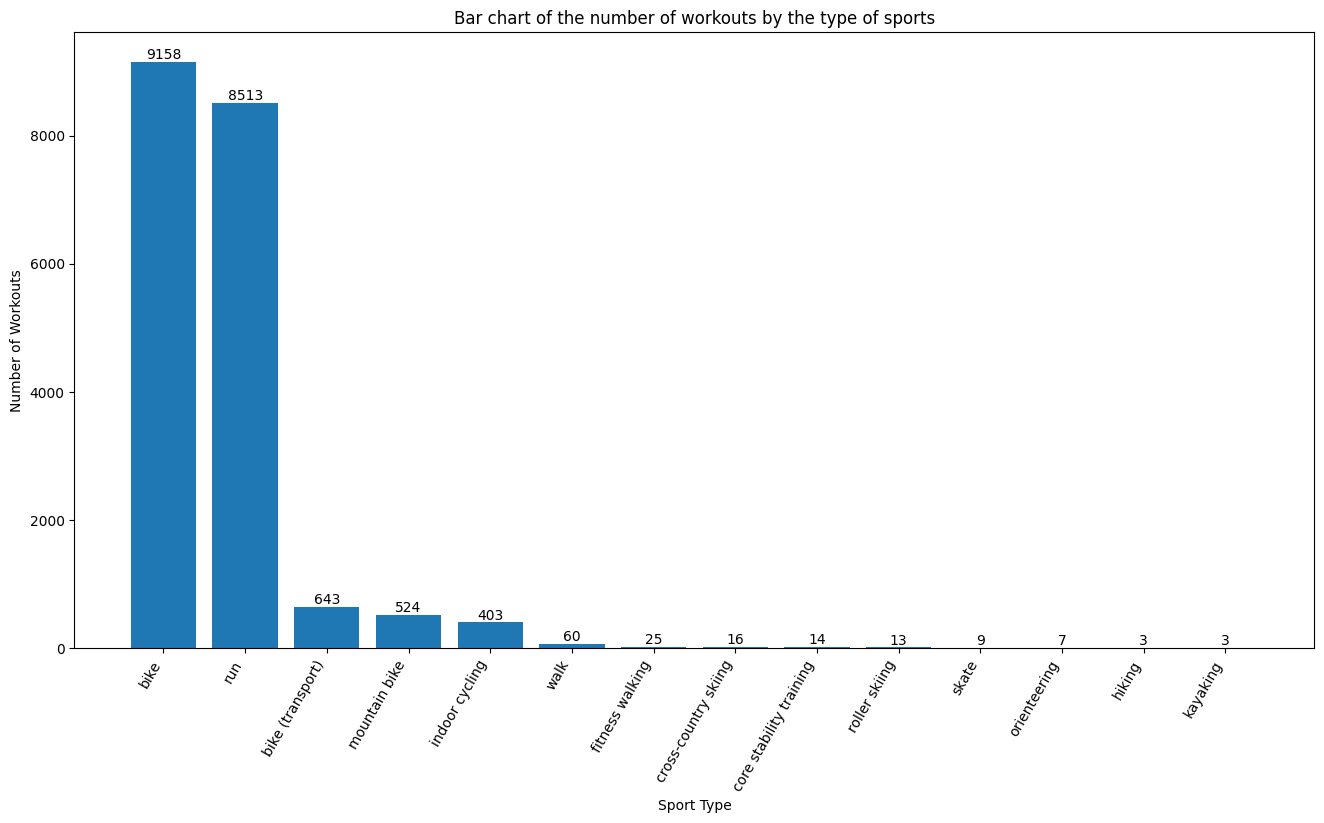

In [ ]:
# TODO: Create a bar chart that visualizes the number of workouts associated with each sport.

# Step 1: Drop duplicate IDs
df_unique = endomondo_df.drop_duplicates(subset='id')

#Step 2: Category type is needed here
sportByType = df_unique['sport'].astype( "category" )
sportByType = sportByType.value_counts()

#Plot the bar chart
cat = np.array( sportByType.index.values )

# Convert the count table into a numpy array
ht = sportByType.to_numpy()

plt.figure(figsize=(16, 8))

# Rotate x-axis labels more steeply and reduce font size
plt.xticks(rotation=60, ha='right', fontsize=10)

plt.xlabel( "Sport Type" )
plt.ylabel( "Number of Workouts" )
plt.title( "Bar chart of the number of workouts by the type of sports" )

bars = plt.bar(cat, ht)

# Add numbers above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, str(int(height)),
             ha='center', va='bottom')

plt.show()

#### 2.3 Heatmap Visualization
Use pallete name `viridis` for the visualization


<u><b>Option 1: Generate a heatmap with standalone values</b></u>




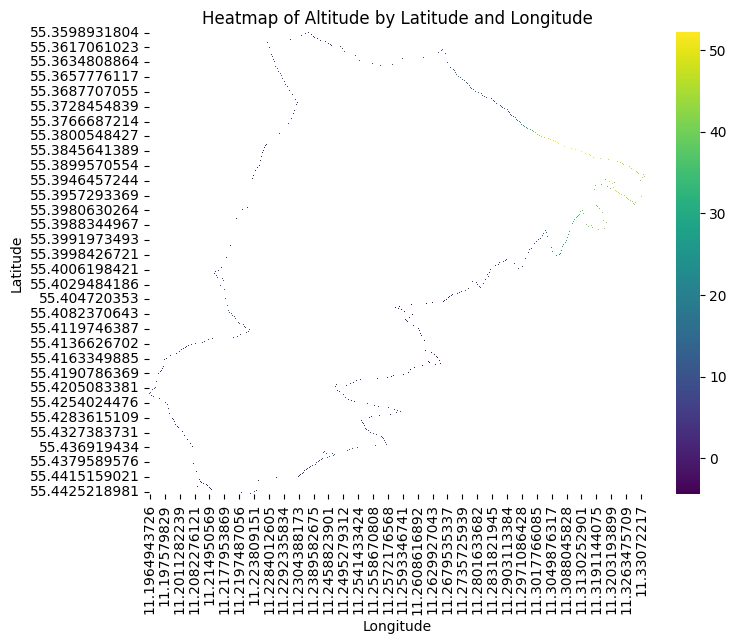

In [ ]:
# TODO: Plot Heatmap with longitude and latitude on the x and y axes, respectively, and color the points based on the Altitude.

USER_ID = 9633831
filtered_df = endomondo_df[endomondo_df['id'] == USER_ID].copy()
heatmap_a_df = filtered_df[['altitude','latitude','longitude']]
data_pivot_a = heatmap_a_df.pivot_table(index='latitude', columns='longitude', values='altitude', aggfunc='mean')

PALLETE_NAME = "viridis"
# TODO: Plot Heatmap with longitude and latitude on the x and y axes, respectively, and color the points based on the Altitude.

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data_pivot_a, cmap= PALLETE_NAME, annot=False, cbar=True)

# Set axis labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Heatmap of Altitude by Latitude and Longitude')

# Show the plot
plt.show()



<u><b>Option 2: Generate heatmap with rounding up values to create bin range </b></u>

NaN accurately reflects the data by showing that there are no altitude readings for those areas, which visually indicates where the individual hasn't travelled.

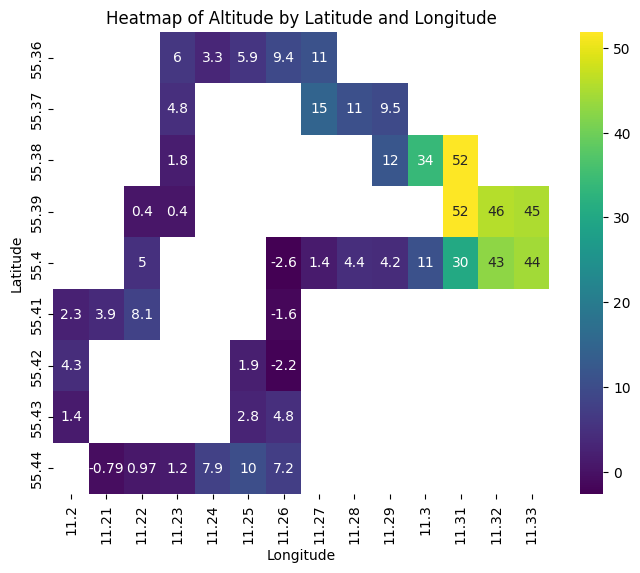

In [ ]:
# TODO: Plot Heatmap with longitude and latitude on the x and y axes, respectively, and color the points based on the Altitude.

USER_ID = 9633831
filtered_df = endomondo_df[endomondo_df['id'] == USER_ID].copy()
heatmap_ar_df = filtered_df[['altitude','latitude','longitude']]

# Round latitude and longitude to reduce granularity
heatmap_ar_df.loc[:,'latitude'] = heatmap_ar_df['latitude'].round(2)
heatmap_ar_df.loc[:,'longitude'] = heatmap_ar_df['longitude'].round(2)

# Recreate the pivot table
data_pivot_ar = heatmap_ar_df.pivot_table(index='latitude', columns='longitude', values='altitude', aggfunc='mean')

# TODO: Plot Heatmap with longitude and latitude on the x and y axes, respectively, and color the points based on the Altitude.
vmin = data_pivot_ar.min().min()
vmax = data_pivot_ar.max().max()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data_pivot_ar, cmap= PALLETE_NAME, annot=True, cbar=True, vmin=vmin, vmax=vmax)

# Set axis labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Heatmap of Altitude by Latitude and Longitude')

# Show the plot
plt.show()

- Next use a different pallet `magma`

<u><b>Option 1: Generate a heatmap with standalone values</b></u>





   



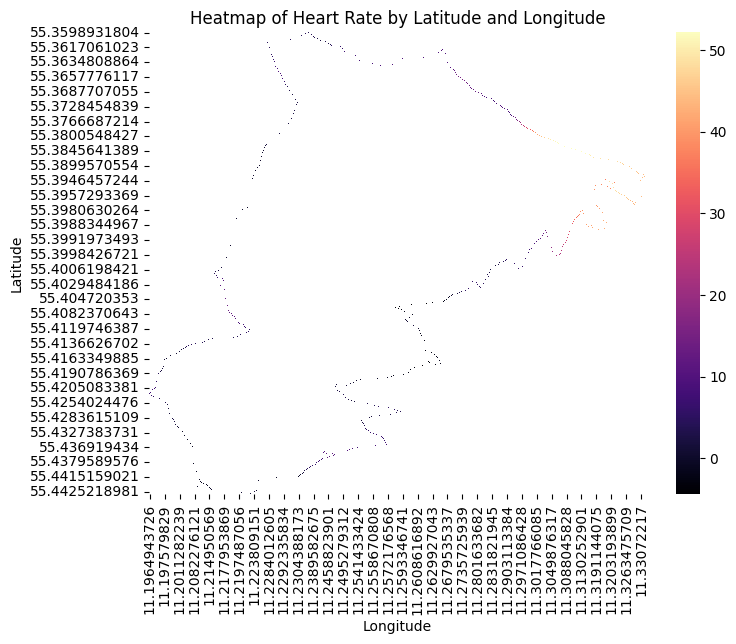

In [ ]:
# TODO: Plot Heatmap with longitude and latitude on the x and y axes, respectively, and color the points based on the Heart Rate.

USER_ID = 9633831
PALLETE_NAME = "magma"

filtered_hr_df = endomondo_df[endomondo_df['id'] == USER_ID].copy()
heatmap_hr_df = filtered_df[['heart_rate','latitude','longitude']]
data_pivot_hr = heatmap_hr_df.pivot_table(index='latitude', columns='longitude', values='heart_rate', aggfunc='mean')

# TODO: Plot Heatmap with longitude and latitude on the x and y axes, respectively, and color the points based on the Altitude.

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data_pivot_a, cmap= PALLETE_NAME, annot=False, cbar=True)

# Set axis labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Heatmap of Heart Rate by Latitude and Longitude')

# Show the plot
plt.show()

<u><b>Option 2: Generate heatmap with rounding up values to create bin range </b></u>

NaN accurately reflects the data by showing that there are no altitude readings for those areas, which visually indicates where the individual hasn't travelled.

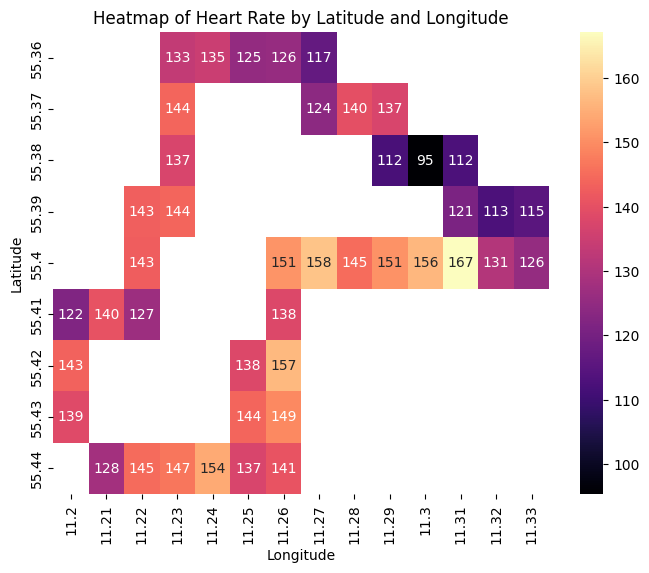

In [ ]:
# TODO: Plot Heatmap with longitude and latitude on the x and y axes, respectively, and color the points based on the Heart Rate.

USER_ID = 9633831
PALLETE_NAME = "magma"

filtered_hrr_df = endomondo_df[endomondo_df['id'] == USER_ID]
heatmap_hrr_df = filtered_df[['heart_rate','latitude','longitude']]

# Round latitude and longitude to reduce granularity
heatmap_hrr_df.loc[:,'latitude'] = heatmap_hrr_df['latitude'].round(2)
heatmap_hrr_df.loc[:,'longitude'] = heatmap_hrr_df['longitude'].round(2)

# Recreate the pivot table
data_pivot_hrr = heatmap_hrr_df.pivot_table(index='latitude', columns='longitude', values='heart_rate')


vmin = data_pivot_hrr.min().min()
vmax = data_pivot_hrr.max().max()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data_pivot_hrr, cmap=PALLETE_NAME, annot=True, fmt=".0f",cbar=True, vmin=vmin, vmax=vmax)

# Set axis labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Heatmap of Heart Rate by Latitude and Longitude')

# Show the plot
plt.show()

## STOP! End of Assignment 1
- **Submit Assignment 1 before continuing with Assignment2 and Final Project deliverable**